In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
file_path = "/kaggle/input/iris-flower-dataset/IRIS.csv"

df = pd.read_csv(file_path)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


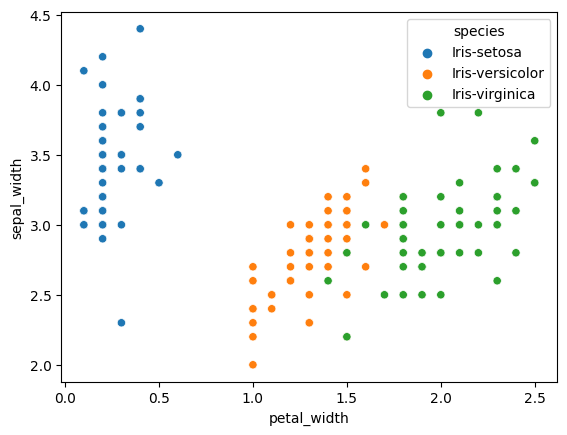

In [12]:
sns.scatterplot(x='petal_width', y='sepal_width', hue='species', data=df)
plt.show()

In [102]:
y = df["species"]
X = df.drop("species", axis=1) 

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


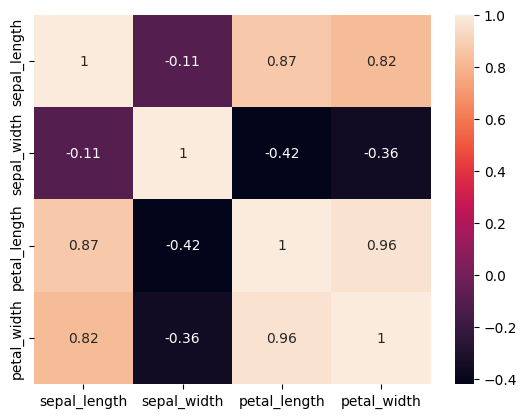

In [103]:
sns.heatmap(X.corr(), annot=True)
plt.show()

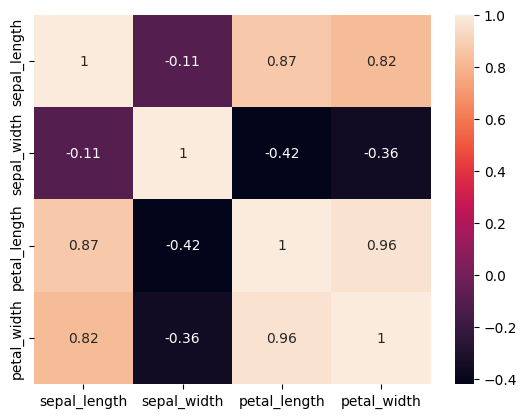

In [105]:
X_clean = X.copy()
#X_Clean["petal_area"] = X_Clean["petal_length"] * X_Clean["petal_width"]
#X_Clean["sepal_area"] = X_Clean["sepal_length"] * X_Clean["sepal_width"]

#X_clean = X_Clean.drop(["petal_length", "petal_width"], axis=1)
#X_clean = X_Clean.drop(["sepal_length", "sepal_width"], axis=1)

sns.heatmap(X_clean.corr(), annot=True)
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.3, random_state=5)

In [112]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

score = tree.score(x_test, y_test)
print("Acurácia:", score)

Acurácia: 0.9555555555555556


In [117]:
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

score = forest.score(x_test, y_test)
print("Acurácia:", score)

Acurácia: 0.9333333333333333


In [121]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

score = logreg.score(x_test, y_test)
print("Acurácia:", score)

Acurácia: 0.9777777777777777


In [128]:
kneig = KNeighborsClassifier(n_neighbors=10)
kneig.fit(x_train, y_train)

score = kneig.score(x_test, y_test)
print("Acurácia:", score)

Acurácia: 0.9777777777777777
